##Data Exploration Assignment
####Using 'Netflix stock dataset' from kaggle

In [3]:
from google.colab import drive 
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [19]:
# required library for visual and stats 
import numpy as np
import pandas as pd #dataset
import seaborn as sns #for graphic effects
import matplotlib.pyplot as plt #to plot
import scipy.stats as stats #statistics 
import sys

#fixed frame size
plt.rcParams['figure.figsize'] = [16, 7]

In [5]:
ds=pd.read_csv(r'/content/gdrive/MyDrive/ml datasets/Netflix.csv')     #dataset imported
print(ds)                     

            Date        Open        High  ...       Close   Adj Close     Volume
0     2002-05-23    1.156429    1.242857  ...    1.196429    1.196429  104790000
1     2002-05-24    1.214286    1.225000  ...    1.210000    1.210000   11104800
2     2002-05-28    1.213571    1.232143  ...    1.157143    1.157143    6609400
3     2002-05-29    1.164286    1.164286  ...    1.103571    1.103571    6757800
4     2002-05-30    1.107857    1.107857  ...    1.071429    1.071429   10154200
...          ...         ...         ...  ...         ...         ...        ...
4576  2020-07-28  496.019989  497.790009  ...  488.510010  488.510010    5986700
4577  2020-07-29  492.250000  494.920013  ...  484.480011  484.480011    6611800
4578  2020-07-30  480.709991  488.350006  ...  485.799988  485.799988    6608600
4579  2020-07-31  488.290009  494.799988  ...  488.880005  488.880005    5924300
4580  2020-08-03  490.859985  503.089996  ...  498.619995  498.619995    5873100

[4581 rows x 7 columns]


In [6]:
ds.info() # to find detail about the column 
#to find data type use '.dtypes'

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4581 entries, 0 to 4580
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       4581 non-null   object 
 1   Open       4581 non-null   float64
 2   High       4581 non-null   float64
 3   Low        4581 non-null   float64
 4   Close      4581 non-null   float64
 5   Adj Close  4581 non-null   float64
 6   Volume     4581 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 250.6+ KB


data of coulmn can be changed to make it easy to manipulate or work on it . 

.astypes() to any dtypes , .to_numeric() for numbers , .to_datetime() for date and time .

In [7]:
ds["Date"]=pd.to_datetime(ds["Date"]) #date and time type
rd = 2 # round of to this many digit
ds["Open"]=ds["Open"].apply(lambda x: round(x,rd))
ds["High"]=ds["High"].apply(lambda x: round(x,rd))
ds["Low"]=ds["Low"].apply(lambda x: round(x,rd))
ds["Close"]=ds["Close"].apply(lambda x: round(x,rd))
ds["Adj Close"]=ds["Adj Close"].apply(lambda x: round(x,rd))
ds["Volume"]=ds["Volume"] / 1000
ds.dtypes

Date         datetime64[ns]
Open                float64
High                float64
Low                 float64
Close               float64
Adj Close           float64
Volume              float64
dtype: object

In [8]:
# after manipulating the data 
print(ds)

           Date    Open    High     Low   Close  Adj Close    Volume
0    2002-05-23    1.16    1.24    1.15    1.20       1.20  104790.0
1    2002-05-24    1.21    1.23    1.20    1.21       1.21   11104.8
2    2002-05-28    1.21    1.23    1.16    1.16       1.16    6609.4
3    2002-05-29    1.16    1.16    1.09    1.10       1.10    6757.8
4    2002-05-30    1.11    1.11    1.07    1.07       1.07   10154.2
...         ...     ...     ...     ...     ...        ...       ...
4576 2020-07-28  496.02  497.79  487.76  488.51     488.51    5986.7
4577 2020-07-29  492.25  494.92  484.13  484.48     484.48    6611.8
4578 2020-07-30  480.71  488.35  477.51  485.80     485.80    6608.6
4579 2020-07-31  488.29  494.80  484.50  488.88     488.88    5924.3
4580 2020-08-03  490.86  503.09  490.23  498.62     498.62    5873.1

[4581 rows x 7 columns]


In [9]:
ds.shape # returns a tuple containing the dimensions (rows x columns) of a dataframe. 

(4581, 7)

In [10]:
# To get statistics for all the columns at the same time
ds.describe()

,Open,High,Low,Close,Adj Close,Volume
count,4581.000000,4581.000000,4581.000000,4581.000000,4581.000000,4581.000000
mean,78.031473,79.285689,76.736049,78.072039,78.072039,17605.164484
std,118.372084,120.276840,116.376782,118.435314,118.435314,19711.302050
min,0.380000,0.410000,0.350000,0.370000,0.370000,285.600000
25%,3.780000,3.860000,3.690000,3.780000,3.780000,6908.900000
50%,15.390000,15.670000,14.970000,15.320000,15.320000,11553.500000
75%,97.830000,99.530000,96.760000,97.890000,97.890000,21134.400000
max,567.980000,575.370000,520.960000,548.730000,548.730000,323414.000000


In [11]:
# Applying mean() to the dataframe returns mean of each columns
ds.mean()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: DataFrame.mean and DataFrame.median with numeric_only=None will include datetime64 and datetime64tz columns in a future version.
  


Open            78.031473
High            79.285689
Low             76.736049
Close           78.072039
Adj Close       78.072039
Volume       17605.164484
dtype: float64

In [12]:
# Applying var() to the dataframe returns variance of each columns
ds.var()

Open         1.401195e+04
High         1.446652e+04
Low          1.354356e+04
Close        1.402692e+04
Adj Close    1.402692e+04
Volume       3.885354e+08
dtype: float64

In [13]:
ds.corr()

,Open,High,Low,Close,Adj Close,Volume
Open,1.000000,0.999841,0.999830,0.999654,0.999654,-0.193770
High,0.999841,1.000000,0.999783,0.999840,0.999840,-0.192108
Low,0.999830,0.999783,1.000000,0.999834,0.999834,-0.195478
Close,0.999654,0.999840,0.999834,1.000000,1.000000,-0.193671
Adj Close,0.999654,0.999840,0.999834,1.000000,1.000000,-0.193671
Volume,-0.193770,-0.192108,-0.195478,-0.193671,-0.193671,1.000000


**Data Visualization**

1. Scatter Plot needs x and y axis column

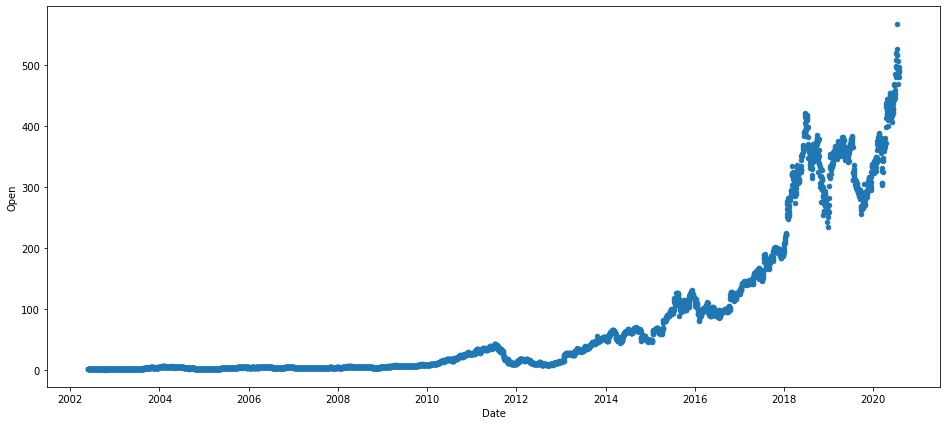

In [21]:
ds.plot(kind = 'scatter', x = 'Date', y = 'Open')

plt.show()



2.Histogram needs only one column

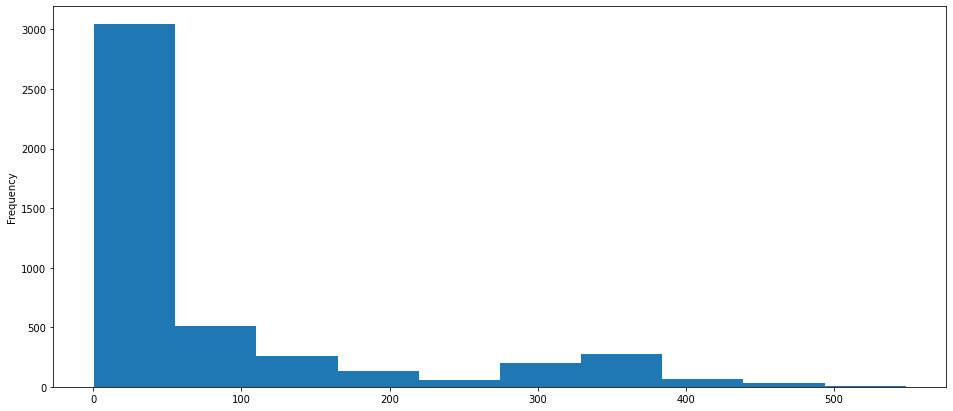

In [24]:
ds['Close'].plot(kind='hist')

##3.Distribution plot using seaborn
#####parameters :(data=None, *, x=None, y=None, hue=None, row=None, col=None, weights=None, kind='hist', rug=False, rug_kws=None, log_scale=None, legend=True, palette=None, hue_order=None, hue_norm=None, color=None, col_wrap=None, row_order=None, col_order=None, height=5, aspect=1, facet_kws=None, **kwargs)

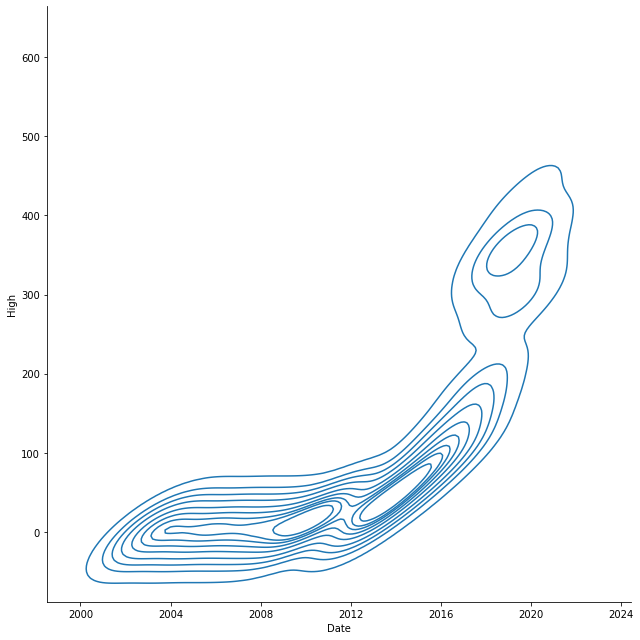

In [78]:
sns.displot(data=ds,x='Date',y='High',kind='kde',height=9) # kernel density estimates 
plt.show()

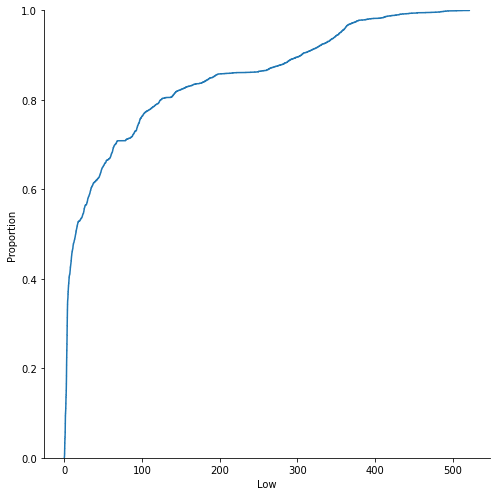

In [79]:
sns.displot(data=ds,x='Low',kind='ecdf',height=7) # empirical cumulative distribution functions
plt.show()

##4. Using matplotlib library

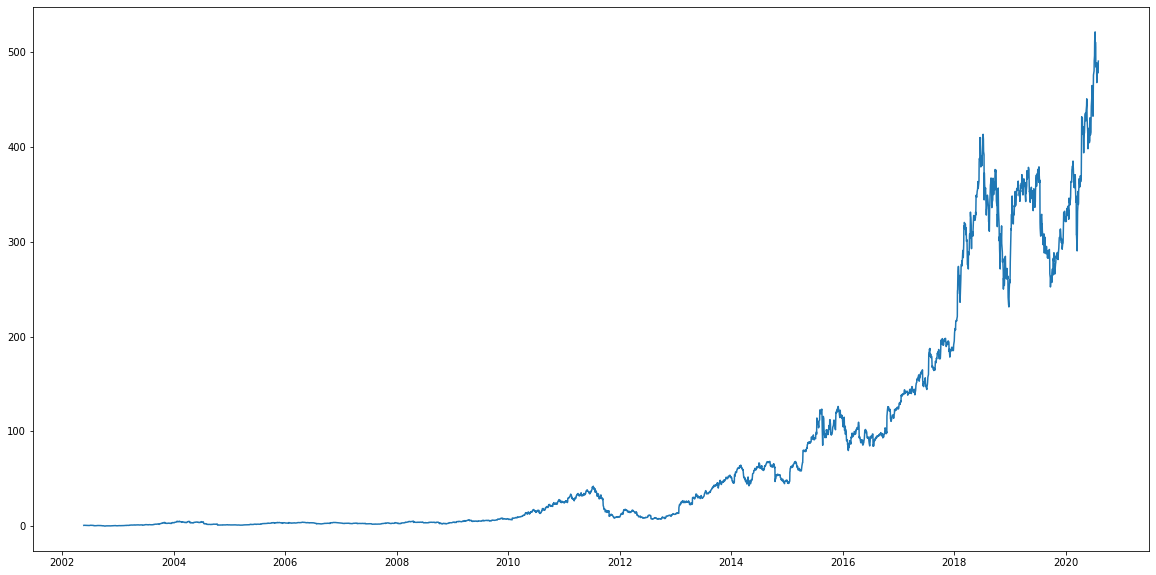

In [80]:
plt.plot(ds['Date'], ds['Low']) #plot function
plt.rcParams["figure.figsize"] = (16,16)
plt.show()

###fmt = marker|line|color
#####i)marker are pattern for dot style
#####ii)line for line style type
#####iii)color for line colour
a)'o'	Circle, '*'	Star, '.'	Point, ','	Pixel	
b)linestyle as 'ls',dotted as ':' ,dashed as '--'.


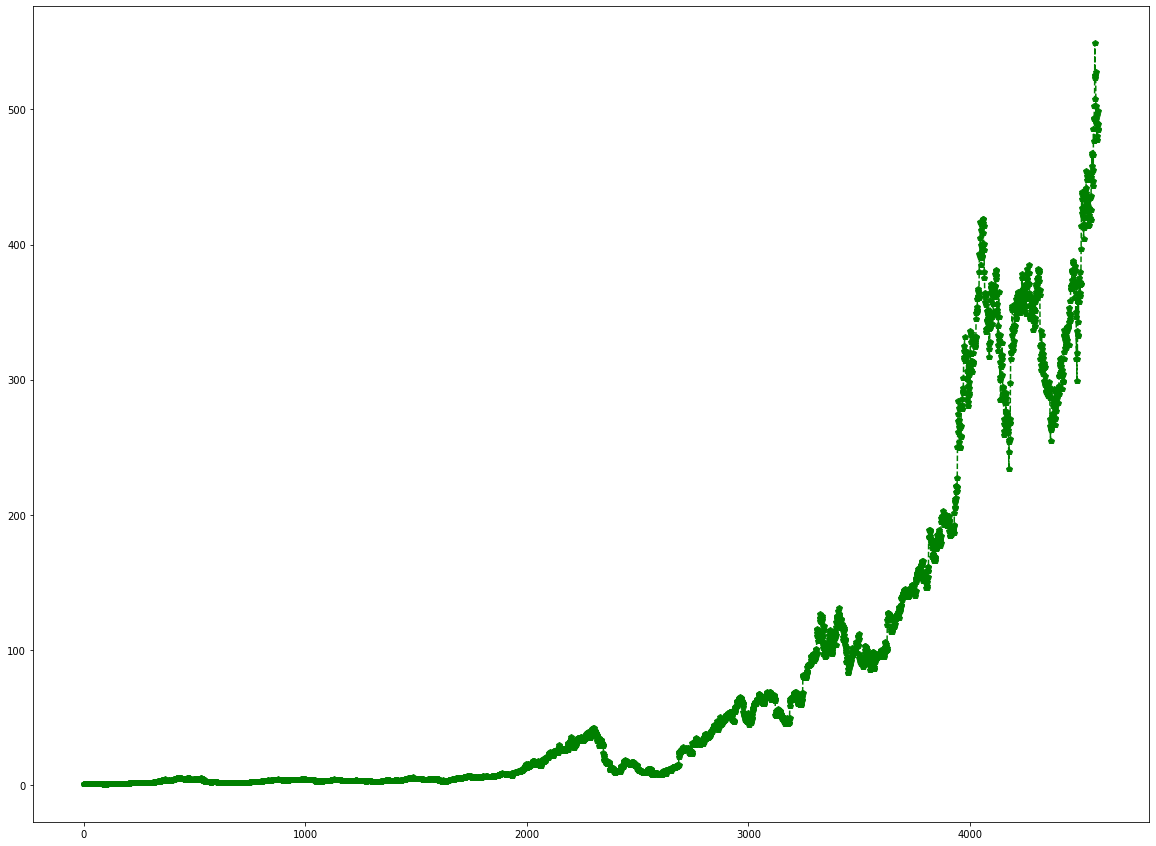

In [86]:
plt.plot(ds['Adj Close'], 'p--g')
plt.rcParams["figure.figsize"] = (14,15)

###*) Using Subplot to plot 4 grids

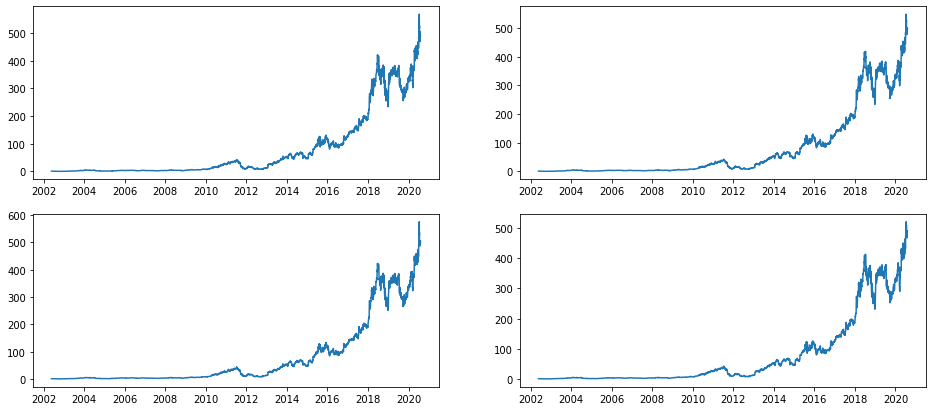

In [42]:
# first number = rows, second number = coloumn , third number = current plot
plt.subplot(2, 2, 1)
plt.plot(ds['Date'],ds['Open'])
plt.subplot(2, 2, 2)
plt.plot(ds['Date'],ds['Close'])
plt.subplot(2, 2, 3)
plt.plot(ds['Date'],ds['High'])
plt.subplot(2, 2, 4)
plt.plot(ds['Date'],ds['Low'])

###5.Bar chart x-y graph

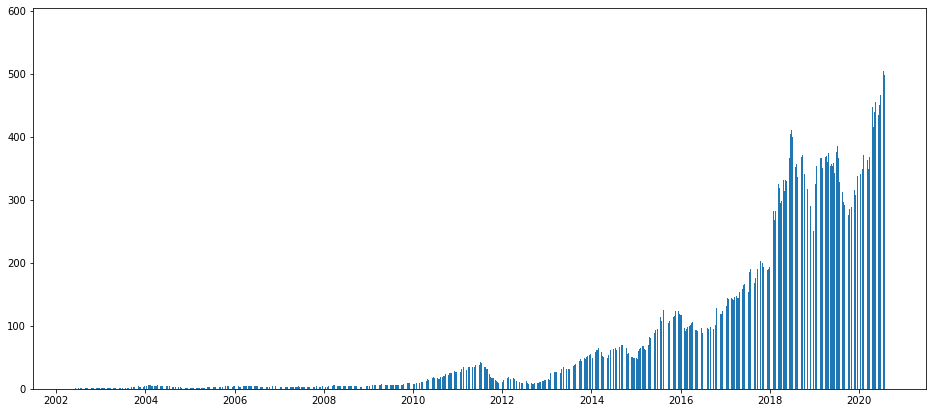

In [43]:
plt.bar(ds["Date"],ds['High'])
plt.show()

###6.pie chart

In [58]:
dk=ds.groupby([ds['Date'].dt.year]).High.mean() # grouped the high column data according to year to draw pie chart
print(dk)

Date
2002      0.884286
2003      2.140198
2004      3.508095
2005      2.653968
2006      3.754104
2007      3.178406
2008      4.200040
2009      6.434444
2010     17.138770
2011     28.020952
2012     12.124040
2013     35.875635
2014     58.287262
2015     93.412421
2016    103.569524
2017    167.048725
2018    325.219323
2019    332.998690
2020    414.192770
Name: High, dtype: float64


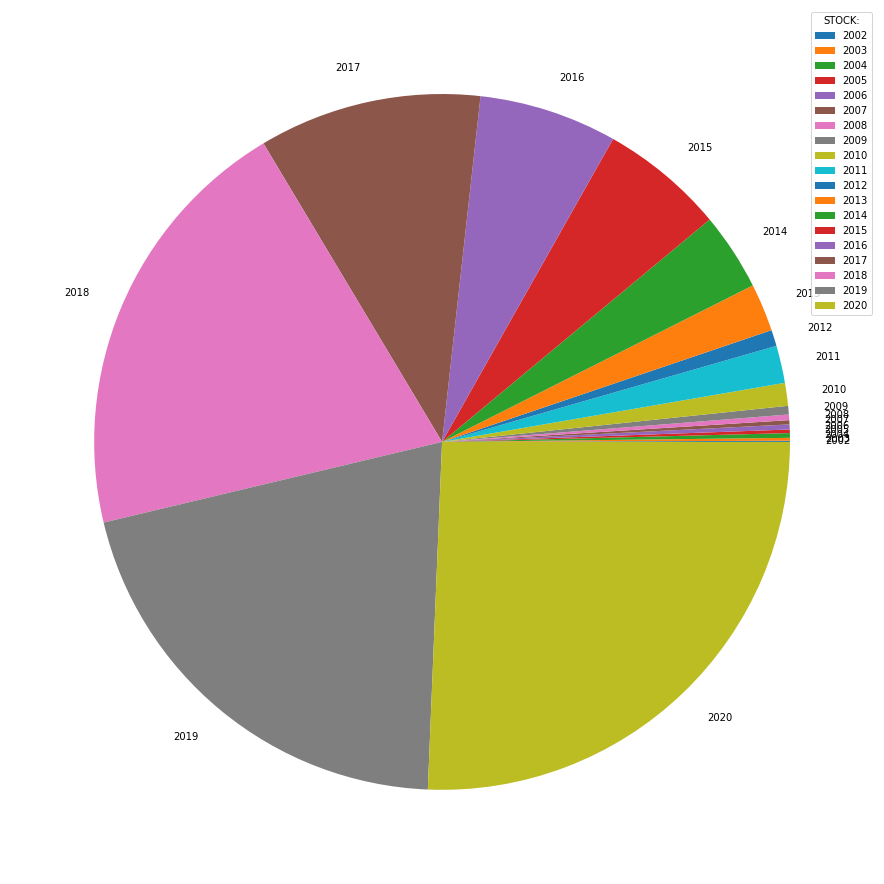

In [66]:
plt.pie(dk,labels=[x for x in range(2002,2021)])
plt.legend(title = "STOCK:")
plt.rcParams["figure.figsize"] = (16,16)
plt.show() 

##7.Boxplot

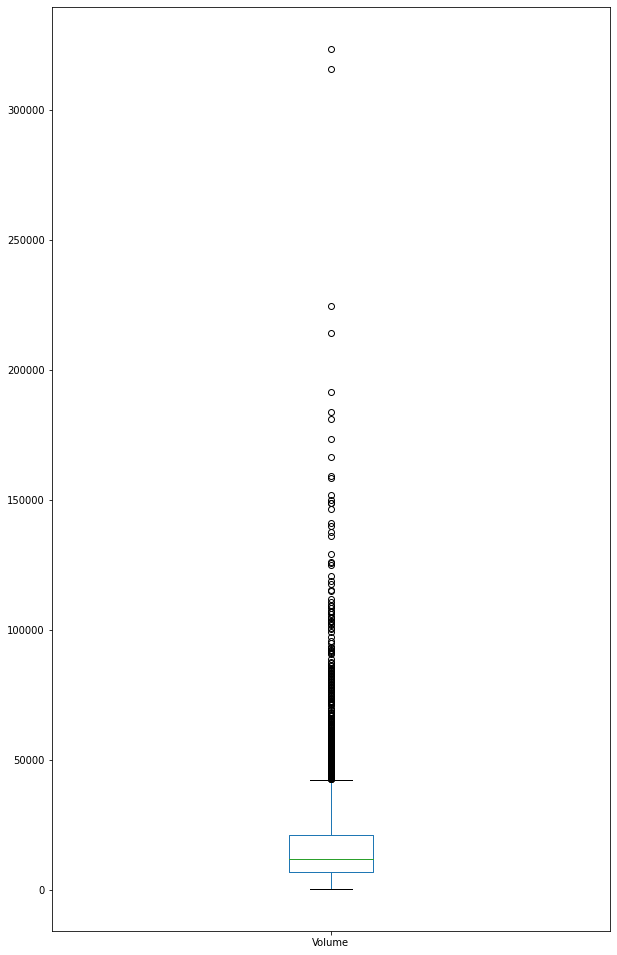

In [73]:
# Box plot of a column
ds['Volume'].plot.box(figsize=(10, 17));